In [2]:
import pandas as pd
import numpy as np
df_with_already_assigned_overall=pd.read_csv('Attacker.csv')
df_with_already_assigned_overall.columns

Index(['PLAYER NAME', 'TEAM NAME', 'MATCHES PLAYED', 'MINUTES PLAYED', 'GOALS',
       'ASSISTS', 'SHOTS', 'CHANCE CREATED', 'PASSES', 'SHOTS ON TARGET',
       'TOUCHES', 'FOULS', 'FOULS EARNED', 'YELLOW CARD', 'RED CARD',
       'AERIAL DUEL WON', 'COUNTRY', 'Overall'],
      dtype='object')

R2 Score: 0.9999999922458428
Mean Squared Error: 1.7930142348632216e-07

Feature Importance Scores:
MATCHES PLAYED: 0.028851203620433807
MINUTES PLAYED: 0.005976266227662563
GOALS: 0.8275384306907654
ASSISTS: 0.0
SHOTS: 0.078849658370018
CHANCE CREATED: 0.03970632702112198
PASSES: 2.0792724626517156e-06
SHOTS ON TARGET: 0.01126462034881115
TOUCHES: 0.0
FOULS: 0.0
FOULS EARNED: 1.894566412374843e-05
YELLOW CARD: 0.0034572507720440626
RED CARD: 3.1590039384354895e-07
AERIAL DUEL WON: 6.988739897906271e-08
Potential: 0.004334802273660898


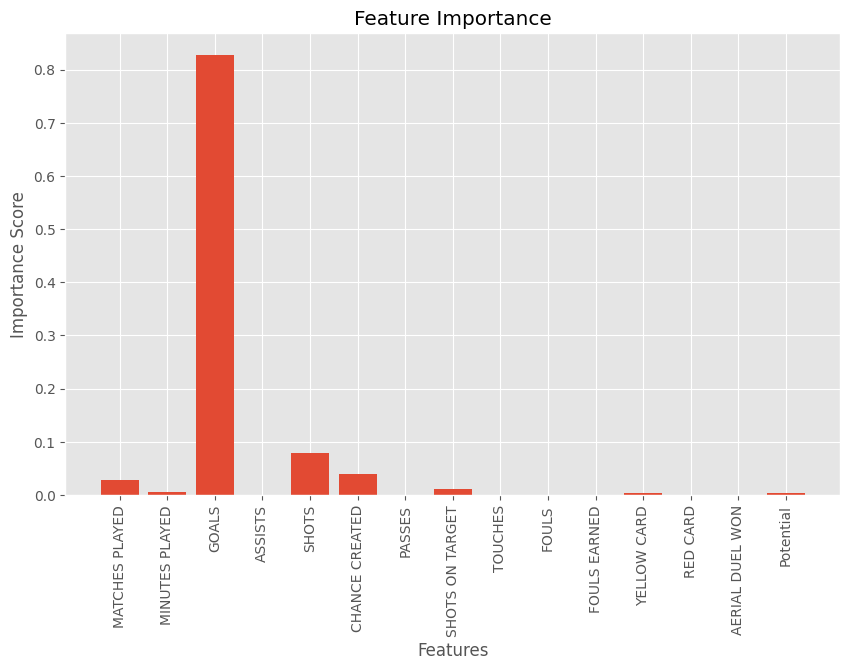

In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Split data into features (X) and target variable (y)
X = df_with_already_assigned_overall.drop(columns=['Overall','PLAYER NAME','TEAM NAME','COUNTRY'])  # Features
y = df_with_already_assigned_overall['Overall']  # Target variable

# Step 2: Convert categorical variables into numerical representation if necessary
# If your data contains categorical variables, you might need to encode them before training the model.

# Step 3: Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Train an XGBoost model using cross-validation
model = xgb.XGBRegressor()
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Step 5: Fit the model on the entire dataset
model.fit(X, y)

# Step 6: Predict on the entire dataset to calculate R2 and MSE
y_pred = model.predict(X)

# Step 7: Calculate R2 and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

# Step 8: Extract feature importance scores from the trained model
feature_importance = model.feature_importances_

# Step 9: Display the numerical values of feature importance
print("\nFeature Importance Scores:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

# Visualize the feature importance scores if desired
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

Learning rate set to 0.021889
0:	learn: 4.8705415	total: 2.03ms	remaining: 2.02s
1:	learn: 4.8172022	total: 3.01ms	remaining: 1.5s
2:	learn: 4.7777649	total: 3.92ms	remaining: 1.3s
3:	learn: 4.7378832	total: 4.58ms	remaining: 1.14s
4:	learn: 4.7037375	total: 5.41ms	remaining: 1.08s
5:	learn: 4.6610943	total: 6.19ms	remaining: 1.02s
6:	learn: 4.6206876	total: 7.3ms	remaining: 1.03s
7:	learn: 4.5835100	total: 8.68ms	remaining: 1.07s
8:	learn: 4.5478013	total: 9.91ms	remaining: 1.09s
9:	learn: 4.5095678	total: 11.7ms	remaining: 1.16s
10:	learn: 4.4712373	total: 12.6ms	remaining: 1.13s
11:	learn: 4.4266703	total: 13.4ms	remaining: 1.1s
12:	learn: 4.3923793	total: 14.2ms	remaining: 1.07s
13:	learn: 4.3536243	total: 14.9ms	remaining: 1.05s
14:	learn: 4.3212866	total: 16ms	remaining: 1.05s
15:	learn: 4.2813041	total: 17.2ms	remaining: 1.05s
16:	learn: 4.2404329	total: 17.8ms	remaining: 1.03s
17:	learn: 4.2061014	total: 18.5ms	remaining: 1.01s
18:	learn: 4.1627461	total: 19ms	remaining: 981ms


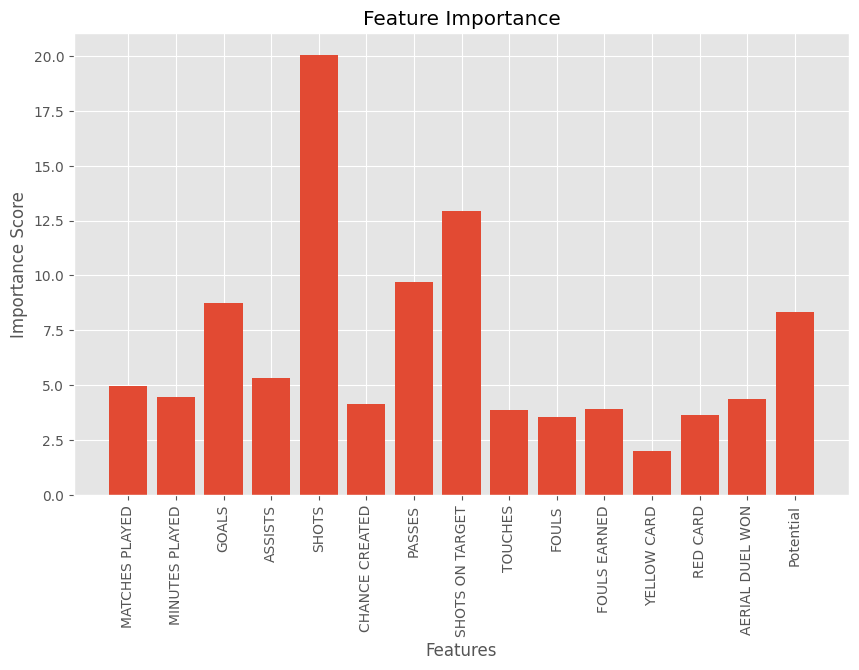

In [9]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Split data into features (X) and target variable (y)
X = df_with_already_assigned_overall.drop(columns=['Overall','PLAYER NAME','TEAM NAME','COUNTRY'])  # Features
y = df_with_already_assigned_overall['Overall']  # Target variable

# Step 2: Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Initialize CatBoost model
model = CatBoostRegressor()

# Step 4: Train the CatBoost model using cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Step 5: Fit the model on the entire dataset
model.fit(X, y)

# Step 6: Predict on the entire dataset to calculate R2 and MSE
y_pred = model.predict(X)

# Step 7: Calculate R2 and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

# Step 8: Extract feature importance scores from the trained model
feature_importance = model.get_feature_importance()

# Step 9: Display the numerical values of feature importance
print("\nFeature Importance Scores:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

# Visualize the feature importance scores if desired
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


R2 Score: 0.9756961934079135
Mean Squared Error: 0.5619833333333334

Feature Importance Scores:
MATCHES PLAYED: 0.040538927813074034
MINUTES PLAYED: 0.045322183231580083
GOALS: 0.33544515562533317
ASSISTS: 0.034394061392214445
SHOTS: 0.16012379835409932
CHANCE CREATED: 0.07573589746139264
PASSES: 0.052876878658199594
SHOTS ON TARGET: 0.09348763935437022
TOUCHES: 0.04098500199737105
FOULS: 0.03493316776475769
FOULS EARNED: 0.04921691308852208
YELLOW CARD: 0.0052568287739735335
RED CARD: 0.0003666256738519175
AERIAL DUEL WON: 0.023095677395344794
Potential: 0.008221243415915368


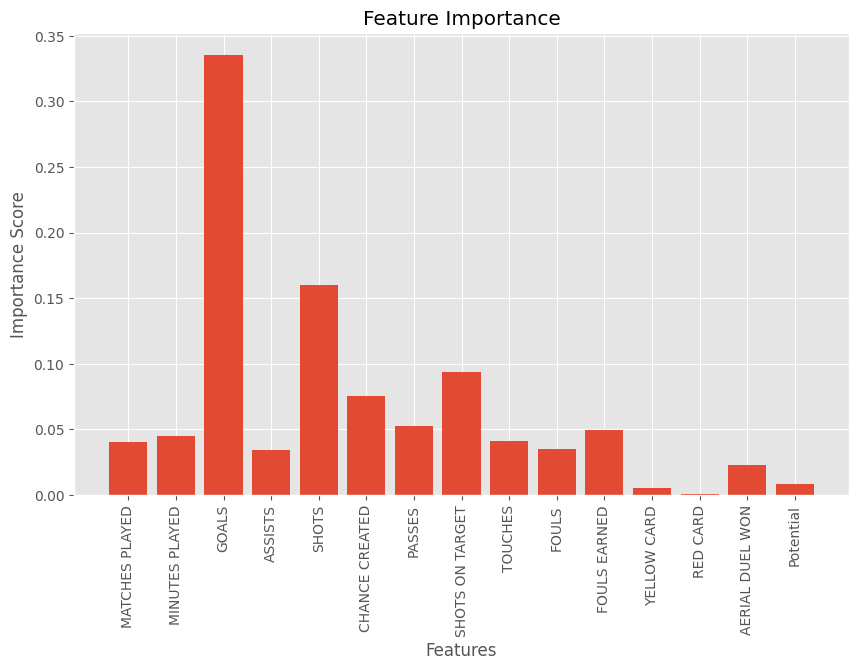

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Split data into features (X) and target variable (y)
X = df_with_already_assigned_overall.drop(columns=['Overall','PLAYER NAME','TEAM NAME','COUNTRY'])  # Features
y = df_with_already_assigned_overall['Overall']  # Target variable

# Step 2: Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Initialize Random Forest model
model = RandomForestRegressor()

# Step 4: Train the Random Forest model using cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Step 5: Fit the model on the entire dataset
model.fit(X, y)

# Step 6: Predict on the entire dataset to calculate R2 and MSE
y_pred = model.predict(X)

# Step 7: Calculate R2 and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

# Step 8: Extract feature importance scores from the trained model
feature_importance = model.feature_importances_

# Step 9: Display the numerical values of feature importance
print("\nFeature Importance Scores:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

# Visualize the feature importance scores if desired
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


R2 Score: 0.9999996860698994
Mean Squared Error: 7.259088558645056e-06

Feature Importance Scores:
MATCHES PLAYED: 0.021212383131926544
MINUTES PLAYED: 0.025169187236411265
GOALS: 0.6841056459897388
ASSISTS: 3.1639116793035784e-07
SHOTS: 0.10484047886674079
CHANCE CREATED: 0.026745058339396992
PASSES: 0.0072989400241983155
SHOTS ON TARGET: 0.08288586590370685
TOUCHES: 0.0049321124068271395
FOULS: 0.018630867290803058
FOULS EARNED: 0.0017000679605172822
YELLOW CARD: 0.012331598993643984
RED CARD: 5.3654500307464685e-05
AERIAL DUEL WON: 0.006455932444238948
Potential: 0.003637890520374658


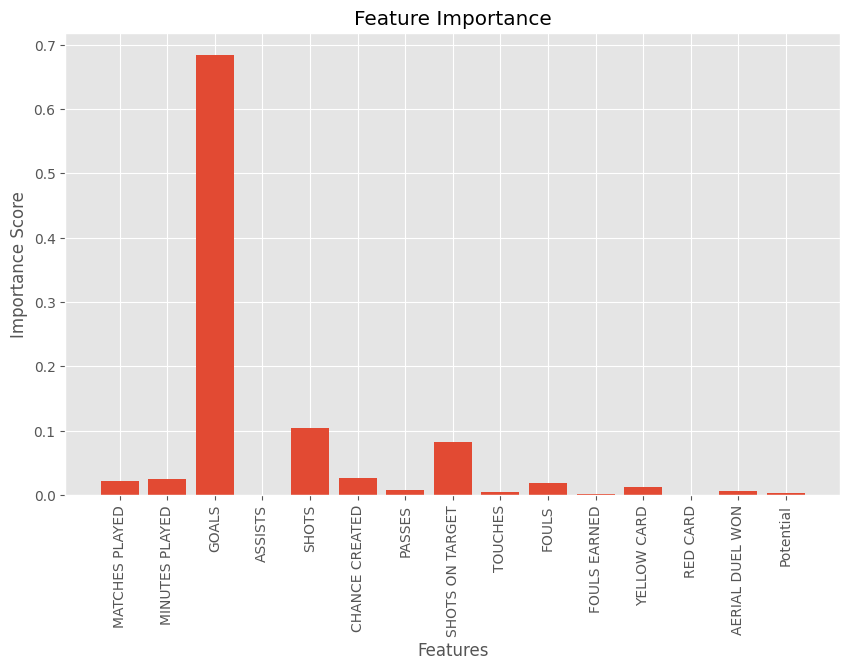

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Split data into features (X) and target variable (y)
X = df_with_already_assigned_overall.drop(columns=['Overall','PLAYER NAME','TEAM NAME','COUNTRY'])  # Features
y = df_with_already_assigned_overall['Overall']  # Target variable

# Step 2: Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Initialize Gradient Boosting model
model = GradientBoostingRegressor()

# Step 4: Train the Gradient Boosting model using cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Step 5: Fit the model on the entire dataset
model.fit(X, y)

# Step 6: Predict on the entire dataset to calculate R2 and MSE
y_pred = model.predict(X)

# Step 7: Calculate R2 and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

# Step 8: Extract feature importance scores from the trained model
feature_importance = model.feature_importances_

# Step 9: Display the numerical values of feature importance
print("\nFeature Importance Scores:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

# Visualize the feature importance scores if desired
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()
